In [97]:
%pip install numpy pandas seaborn matplotlib scikit-learn xgboost joblib json

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [98]:
#importing libraires
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import json

In [99]:
df=pd.read_csv(r'C:\Users\anjan\OneDrive\Desktop\codeclause\heart\data\heart_disease_uci.csv')

In [100]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [102]:
df.shape

(920, 16)

In [103]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [104]:
df=df.drop(columns=['id','dataset','ca','thal'])

In [105]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [106]:
numcols=['age','trestbps','chol','thalch','oldpeak']

In [107]:
for c in numcols:
    df[c].fillna(df[c].median(),inplace=True)

C:\Users\anjan\AppData\Local\Temp\ipykernel_4548\3264978791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(),inplace=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_4548\3264978791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [108]:
catcols=['sex','cp','fbs','restecg','exang','slope']

In [109]:
for c in catcols:
    df[c].fillna(df[c].mode()[0],inplace=True)

C:\Users\anjan\AppData\Local\Temp\ipykernel_4548\1665307417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0],inplace=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_4548\1665307417.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c].fillna(df[c].mode()[0],inplace=True)


In [110]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [111]:
for c in numcols:
    q1,q99=df[c].quantile([0.01,0.99])
    df[c]=df[c].clip(q1,q99)

In [112]:
df['num']=df['num'].apply(lambda x: 1 if x>0 else 0)

In [113]:
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

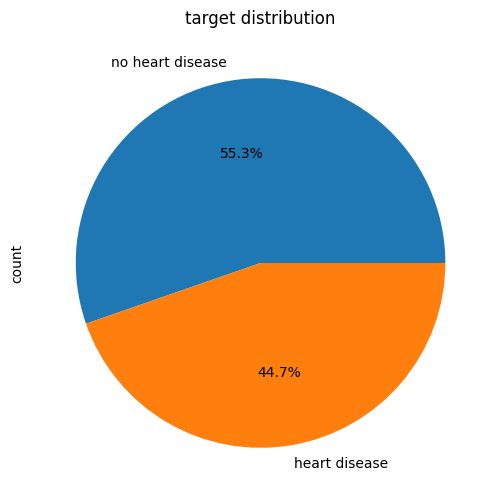

In [114]:
plt.figure(figsize=(7,6))
df['num'].value_counts().plot.pie(autopct='%1.1f%%',labels=['no heart disease','heart disease'])
plt.title('target distribution')
plt.savefig('visualizations/target_dist.png')
plt.show()
plt.close()

In [115]:
for c in catcols:
    df[c]=df[c].astype('category').cat.codes

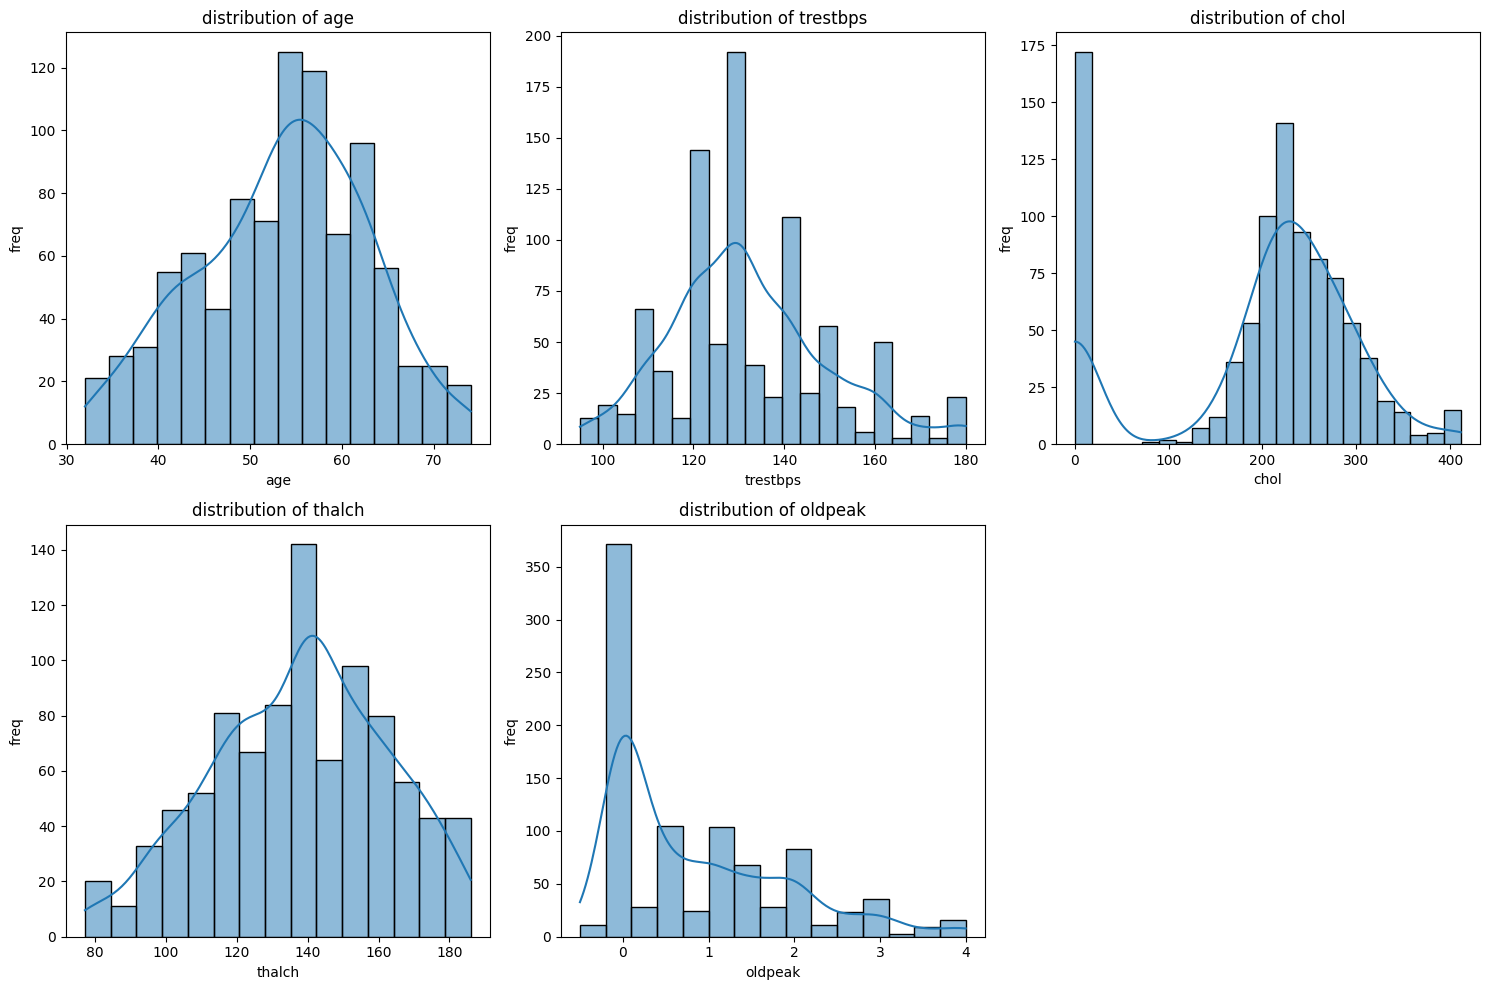

In [116]:
plt.figure(figsize=(15,10))
for i,c in enumerate(numcols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[c],kde=True)
    plt.title(f'distribution of {c}')
    plt.xlabel(c)
    plt.ylabel('freq')
plt.tight_layout()
plt.savefig('visualizations/num_histogram.png')
plt.show()
plt.close()

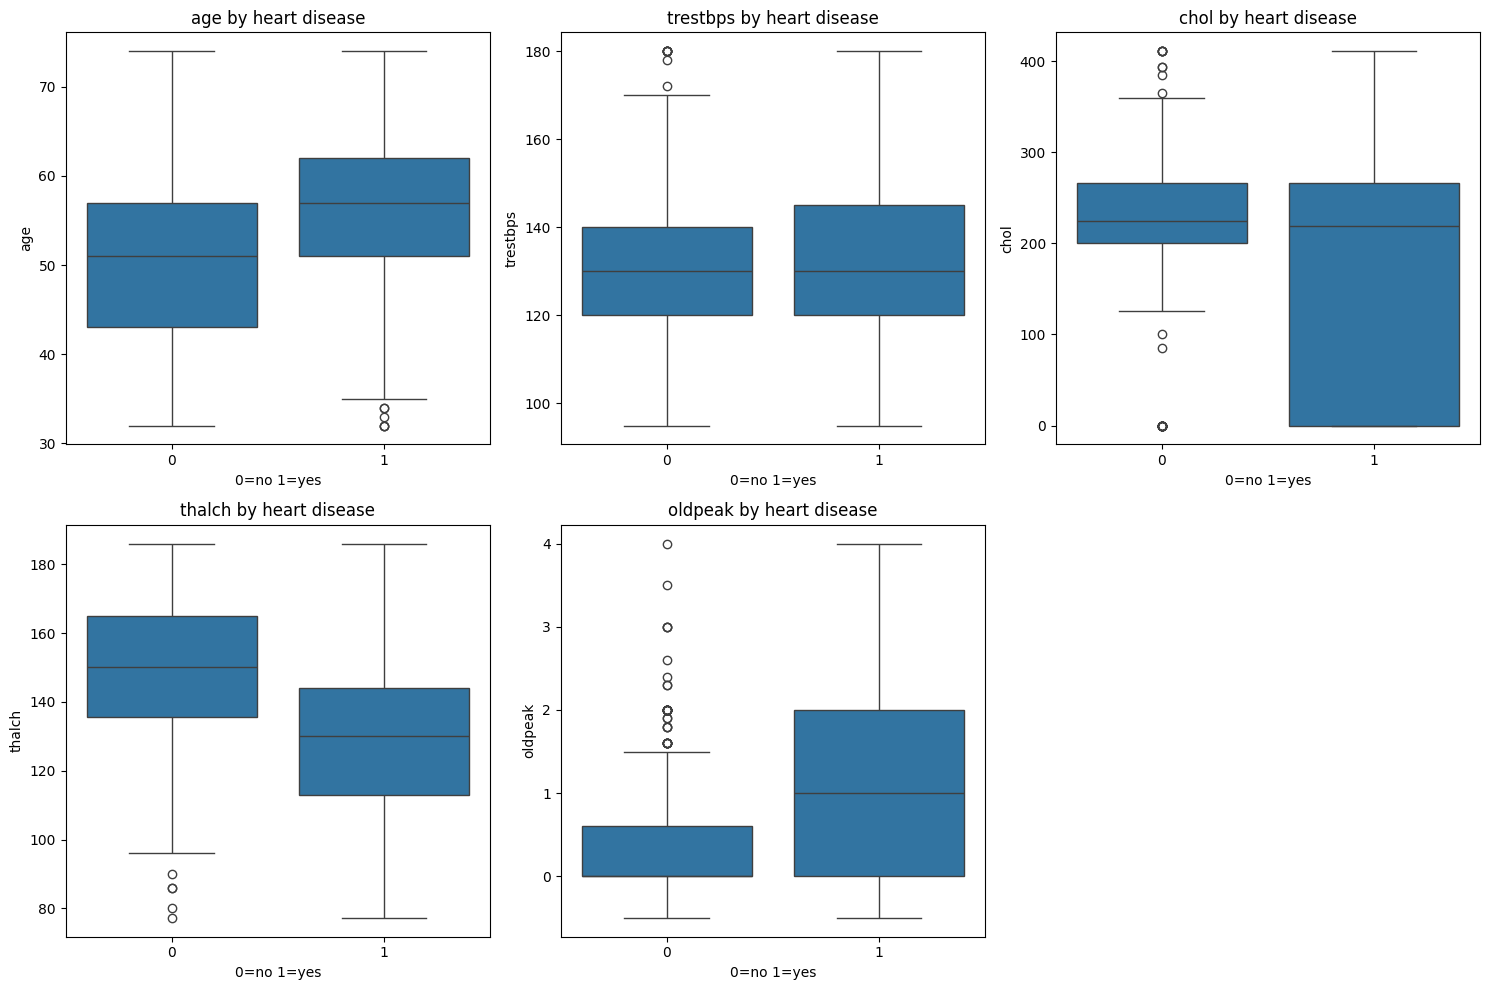

In [117]:
plt.figure(figsize=(15,10))
for i,c in enumerate(numcols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x='num',y=c,data=df)
    plt.title(f"{c} by heart disease")
    plt.xlabel('0=no 1=yes')
    plt.ylabel(c)
plt.tight_layout()
plt.savefig('visualizations/box_plots.png')
plt.show()
plt.close()

In [118]:
scaler=RobustScaler()

In [119]:
df[numcols]=scaler.fit_transform(df[numcols])

In [120]:
joblib.dump(scaler,'models/scaler.pkl')

['models/scaler.pkl']

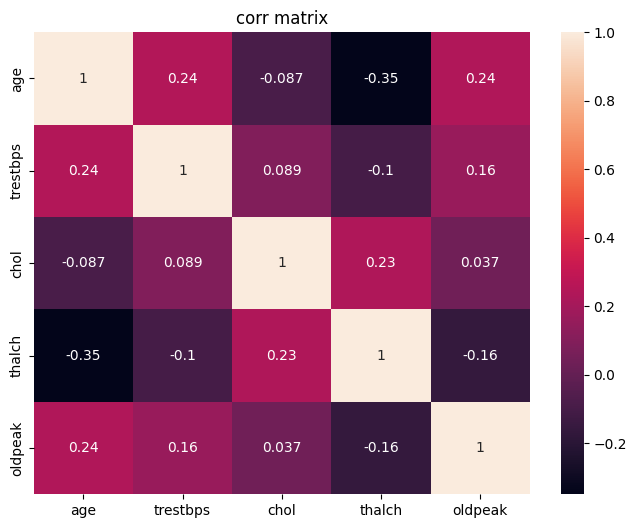

In [121]:
plt.figure(figsize=(8,6))
corrm=df[numcols].corr()
sns.heatmap(corrm, annot=True)
plt.title('corr matrix')
plt.savefig('visualizations/corr_heatmap.png')
plt.show()
plt.close()

In [122]:
X=df.drop('num',axis=1)
y=df['num']

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
rf={
    'n_estimators':[100,200,300,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
xgb={
    'n_estimators':[100,200,300,500],
    'max_depth':[3,5,7,9],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'subsample':[0.7,0.8,0.9,1.0]
}
gb={
    'n_estimators':[100,200,300,500],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'subsample':[0.7,0.8,0.9,1.0]
}

In [125]:
rf_model=RandomForestClassifier(random_state=42)
rf_grid=GridSearchCV(rf_model,rf,cv=5,scoring='accuracy',n_jobs=-1)
rf_grid.fit(X_train,y_train)
rf_pred=rf_grid.predict(X_test)
rf_acc=accuracy_score(y_test,rf_pred)
rf_prec=precision_score(y_test,rf_pred)
rf_recall=recall_score(y_test,rf_pred)
rf_f1=f1_score(y_test,rf_pred)
print(rf_acc)
print(rf_prec)
print(rf_recall)
print(rf_f1)

0.8369565217391305
0.8691588785046729
0.8532110091743119
0.8611111111111112


In [126]:
xgb_model=XGBClassifier(random_state=42,eval_metric='logloss')
xgb_grid = GridSearchCV(xgb_model,xgb,cv=5,scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train,y_train)
xgb_pred=xgb_grid.predict(X_test)
xgb_acc=accuracy_score(y_test,xgb_pred)
xgb_prec=precision_score(y_test,xgb_pred)
xgb_recall=recall_score(y_test,xgb_pred)
xgb_f1=f1_score(y_test,xgb_pred)
print(xgb_acc)
print(xgb_prec)
print(xgb_recall)
print(xgb_f1)

0.8206521739130435
0.8653846153846154
0.8256880733944955
0.8450704225352113


In [127]:
gb_model=GradientBoostingClassifier(random_state=42)
gb_grid=GridSearchCV(gb_model,gb,cv=5,scoring='accuracy',n_jobs=-1)
gb_grid.fit(X_train,y_train)
gb_pred=gb_grid.predict(X_test)
gb_acc=accuracy_score(y_test,gb_pred)
gb_prec=precision_score(y_test,gb_pred)
gb_recall=recall_score(y_test,gb_pred)
gb_f1=f1_score(y_test, gb_pred)
print(gb_acc)
print(gb_prec)
print(gb_recall)
print(gb_f1)

0.8206521739130435
0.8584905660377359
0.8348623853211009
0.8465116279069768


In [128]:
acc={
    'rf':rf_acc,
    'xgb':xgb_acc,
    'gb':gb_acc,
}

In [129]:
best_model=max(acc,key=acc.get)
print(best_model, acc[best_model])

rf 0.8369565217391305


In [130]:
if best_model=='rf':
    best_model_instance=rf_grid.best_estimator_
    metrics={'accuracy':rf_acc,'precision':rf_prec,'recall':rf_recall,'f1':rf_f1}
elif best_model=='xgb':
    best_model_instance=xgb_grid.best_estimator_
    metrics={'accuracy':xgb_acc,'precision':xgb_prec,'recall':xgb_recall,'f1':xgb_f1}
else:
    best_model_instance=gb_grid.best_estimator_
    metrics={'accuracy':gb_acc,'precision':gb_prec,'recall':gb_recall,'f1':gb_f1}
joblib.dump(best_model_instance,'models/best_model.pkl')

['models/best_model.pkl']

In [131]:
with open('models/metrics.json','w') as f:
    json.dump(metrics,f)

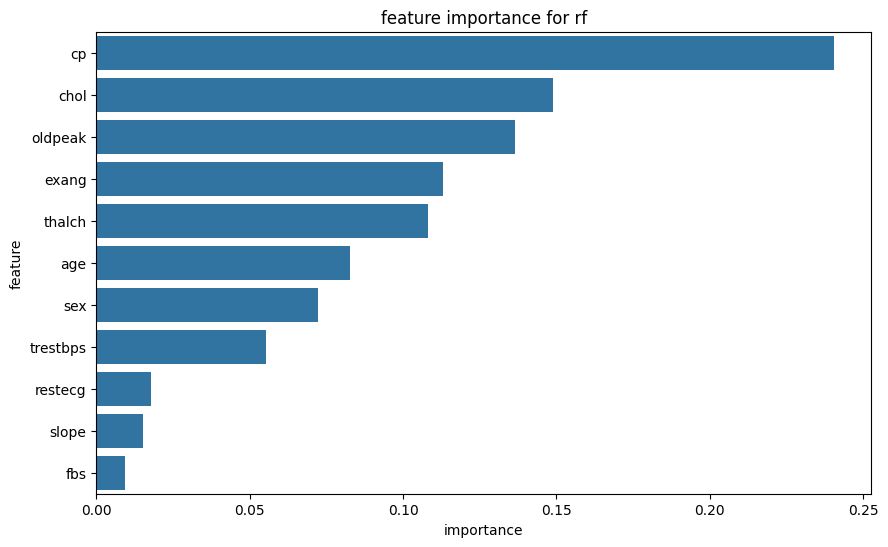

In [132]:
if best_model in ['rf','xgb','gb']:
    plt.figure(figsize=(10,6))
    ft_imp=best_model_instance.feature_importances_
    ft_names=X.columns
    imp_df=pd.DataFrame({'feature':ft_names,'importance':ft_imp})
    imp_df=imp_df.sort_values(by='importance',ascending=False)
    sns.barplot(x='importance',y='feature',data=imp_df)
    plt.title(f'feature importance for {best_model}')
    plt.savefig('visualizations/ft_importance.png')
    plt.show()
    plt.close()

In [133]:
df.to_csv('data/heart_disease_uci_preprocessed.csv',index=False)